In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

In [2]:
pitches_2021 = pd.read_csv("C:\\Users\\blake\\OneDrive\\Desktop\\rays\\pitches_21.csv")
#pitches_2022 = pd.read_csv("C:\\Users\\blake\\OneDrive\\Desktop\\rays\\pitches_22.csv")
#pitches_2023 = pd.read_csv("C:\\Users\\blake\\OneDrive\\Desktop\\rays\\pitches_22.csv")

# Going to just use 2021

In [3]:
pitches_2021.columns

Index(['Unnamed: 0', 'gameid', 'GameDate', 'ab', 'pitchnum', 'inning',
       'teambat', 'balls', 'strikes', 'outs', 'pitcher', 'pitcherthrows',
       'batter', 'batterside', 'pitchresult', 'pitchresult_desc', 'eventtype',
       'pitchname', 'pitchname_desc', 'spinrate', 'relspeed', 'horzbreak',
       'inducedvertbreak', 'platelocside', 'platelocheight', 'hometeam_id',
       'Home', 'awayteam_id', 'Visitor', 'venue_id', 'venue_name'],
      dtype='object')

In [4]:
pitches_2021

,Unnamed: 0,gameid,GameDate,ab,pitchnum,inning,teambat,balls,strikes,outs,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
0,1,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,1,4.0,1,0.0,0.0,1.0,...,14.701180,7.648054,0.143656,1.514166,115,Colorado Rockies,121,New York Mets,19,Coors Field
1,2,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,2,4.0,1,0.0,1.0,1.0,...,-2.161110,4.845070,1.277162,1.246100,115,Colorado Rockies,121,New York Mets,19,Coors Field
2,3,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,3,4.0,1,1.0,1.0,1.0,...,13.426973,11.059589,-0.826248,2.734800,115,Colorado Rockies,121,New York Mets,19,Coors Field
3,4,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,32,1,4.0,1,0.0,0.0,1.0,...,14.428921,7.975150,0.330990,1.054213,115,Colorado Rockies,121,New York Mets,19,Coors Field
4,5,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,35,1,5.0,0,0.0,0.0,1.0,...,3.791252,10.746025,0.064407,3.774802,115,Colorado Rockies,121,New York Mets,19,Coors Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706904,706905,2021/10/02/nynmlb-atlmlb-1,10/2/2021 23:15,42,8,5.0,1,0.0,2.0,2.0,...,12.777756,5.362740,-0.295482,2.166446,144,Atlanta Braves,121,New York Mets,4705,Truist Park
706905,706906,2021/10/02/nynmlb-atlmlb-1,10/2/2021 23:15,43,1,5.0,1,0.0,0.0,2.0,...,7.615064,-0.164651,-0.438475,1.132619,144,Atlanta Braves,121,New York Mets,4705,Truist Park
706906,706907,2021/10/02/nynmlb-atlmlb-1,10/2/2021 23:15,43,2,5.0,1,0.0,1.0,2.0,...,5.507193,14.064531,0.894155,2.744111,144,Atlanta Braves,121,New York Mets,4705,Truist Park
706907,706908,2021/10/02/nynmlb-atlmlb-1,10/2/2021 23:15,43,3,5.0,1,1.0,1.0,2.0,...,5.922451,13.146690,0.216244,3.111117,144,Atlanta Braves,121,New York Mets,4705,Truist Park


In [5]:
pitches_2021 = pitches_2021.drop(columns=['Unnamed: 0'])
pitches_2021.dropna()

,gameid,GameDate,ab,pitchnum,inning,teambat,balls,strikes,outs,pitcher,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
0,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,1,4.0,1,0.0,0.0,1.0,"Gsellman, Robert",...,14.701180,7.648054,0.143656,1.514166,115,Colorado Rockies,121,New York Mets,19,Coors Field
1,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,2,4.0,1,0.0,1.0,1.0,"Gsellman, Robert",...,-2.161110,4.845070,1.277162,1.246100,115,Colorado Rockies,121,New York Mets,19,Coors Field
2,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,3,4.0,1,1.0,1.0,1.0,"Gsellman, Robert",...,13.426973,11.059589,-0.826248,2.734800,115,Colorado Rockies,121,New York Mets,19,Coors Field
3,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,32,1,4.0,1,0.0,0.0,1.0,"Gsellman, Robert",...,14.428921,7.975150,0.330990,1.054213,115,Colorado Rockies,121,New York Mets,19,Coors Field
4,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,35,1,5.0,0,0.0,0.0,1.0,"Marquez, German",...,3.791252,10.746025,0.064407,3.774802,115,Colorado Rockies,121,New York Mets,19,Coors Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706904,2021/10/02/nynmlb-atlmlb-1,10/2/2021 23:15,42,8,5.0,1,0.0,2.0,2.0,"Carrasco, Carlos",...,12.777756,5.362740,-0.295482,2.166446,144,Atlanta Braves,121,New York Mets,4705,Truist Park
706905,2021/10/02/nynmlb-atlmlb-1,10/2/2021 23:15,43,1,5.0,1,0.0,0.0,2.0,"Carrasco, Carlos",...,7.615064,-0.164651,-0.438475,1.132619,144,Atlanta Braves,121,New York Mets,4705,Truist Park
706906,2021/10/02/nynmlb-atlmlb-1,10/2/2021 23:15,43,2,5.0,1,0.0,1.0,2.0,"Carrasco, Carlos",...,5.507193,14.064531,0.894155,2.744111,144,Atlanta Braves,121,New York Mets,4705,Truist Park
706907,2021/10/02/nynmlb-atlmlb-1,10/2/2021 23:15,43,3,5.0,1,1.0,1.0,2.0,"Carrasco, Carlos",...,5.922451,13.146690,0.216244,3.111117,144,Atlanta Braves,121,New York Mets,4705,Truist Park


In [6]:
# Convert GameDate to datetime
pitches_2021['GameDate'] = pd.to_datetime(pitches_2021['GameDate'])

In [7]:
pitches_2021.dropna()

,gameid,GameDate,ab,pitchnum,inning,teambat,balls,strikes,outs,pitcher,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
0,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,31,1,4.0,1,0.0,0.0,1.0,"Gsellman, Robert",...,14.701180,7.648054,0.143656,1.514166,115,Colorado Rockies,121,New York Mets,19,Coors Field
1,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,31,2,4.0,1,0.0,1.0,1.0,"Gsellman, Robert",...,-2.161110,4.845070,1.277162,1.246100,115,Colorado Rockies,121,New York Mets,19,Coors Field
2,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,31,3,4.0,1,1.0,1.0,1.0,"Gsellman, Robert",...,13.426973,11.059589,-0.826248,2.734800,115,Colorado Rockies,121,New York Mets,19,Coors Field
3,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,32,1,4.0,1,0.0,0.0,1.0,"Gsellman, Robert",...,14.428921,7.975150,0.330990,1.054213,115,Colorado Rockies,121,New York Mets,19,Coors Field
4,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,35,1,5.0,0,0.0,0.0,1.0,"Marquez, German",...,3.791252,10.746025,0.064407,3.774802,115,Colorado Rockies,121,New York Mets,19,Coors Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706904,2021/10/02/nynmlb-atlmlb-1,2021-10-02 23:15:00,42,8,5.0,1,0.0,2.0,2.0,"Carrasco, Carlos",...,12.777756,5.362740,-0.295482,2.166446,144,Atlanta Braves,121,New York Mets,4705,Truist Park
706905,2021/10/02/nynmlb-atlmlb-1,2021-10-02 23:15:00,43,1,5.0,1,0.0,0.0,2.0,"Carrasco, Carlos",...,7.615064,-0.164651,-0.438475,1.132619,144,Atlanta Braves,121,New York Mets,4705,Truist Park
706906,2021/10/02/nynmlb-atlmlb-1,2021-10-02 23:15:00,43,2,5.0,1,0.0,1.0,2.0,"Carrasco, Carlos",...,5.507193,14.064531,0.894155,2.744111,144,Atlanta Braves,121,New York Mets,4705,Truist Park
706907,2021/10/02/nynmlb-atlmlb-1,2021-10-02 23:15:00,43,3,5.0,1,1.0,1.0,2.0,"Carrasco, Carlos",...,5.922451,13.146690,0.216244,3.111117,144,Atlanta Braves,121,New York Mets,4705,Truist Park


In [8]:
"""pitches_2021['pitchnum'] = pitches_2021.groupby('gameid').cumcount() + 1
pitches_2021 = pitches_2021.sort_values(by = ['pitcher', 'GameDate'])
# Calculate days of rest since last appearance
pitches_2021['days_rest'] = pitches_2021.groupby('pitcher')['GameDate'].diff().dt.days.fillna(0)"""

"pitches_2021['pitchnum'] = pitches_2021.groupby('gameid').cumcount() + 1\npitches_2021 = pitches_2021.sort_values(by = ['pitcher', 'GameDate'])\n# Calculate days of rest since last appearance\npitches_2021['days_rest'] = pitches_2021.groupby('pitcher')['GameDate'].diff().dt.days.fillna(0)"

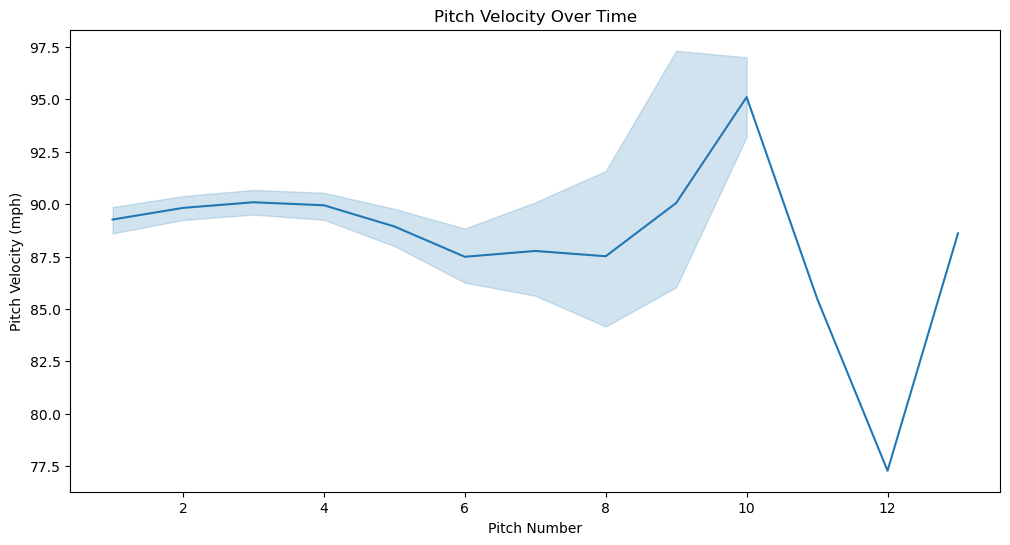

In [9]:
ohtani_data = pitches_2021[pitches_2021["pitcher"] == "Ohtani, Shohei"]

plt.figure(figsize = (12, 6))
sns.lineplot(x='pitchnum', y='relspeed', data= ohtani_data)
plt.title('Pitch Velocity Over Time')
plt.xlabel('Pitch Number')
plt.ylabel('Pitch Velocity (mph)')
plt.show()

ValueError: could not convert string to float: '2021/04/17/nynmlb-colmlb-2'